In [1]:
# 항상 코드의 최상단에 위치해야 함.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# 구글 드라이브와 마운트가 된 상태에서 아래 코드를 수행.
import pandas as pd
import numpy as np

path = './drive/MyDrive/ML2024/'
filename = 'Iris.csv'

data_pd = pd.read_csv(path + filename)
print(data_pd)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           LABEL
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


**문자형 데이터를 수치형 데이터로 변환하기**

why ? 기계학습 모델을 실행하기 위해 모든 속성을 수치형으로 변환해야 한다.


---



<클래스>

Iris-setosa : 0

Iris-versicolor : 1

Iris-viginica : 2



<속성>

SepalLengthCm(꽃받침 길이)

SepalWidthCm(꽃받침 너비)

PetalLengthCm(꽃잎 길이)

PetalWidthCm(꽃잎 너비)

In [3]:
num_label, uni_label = pd.factorize(data_pd['LABEL'])

#print(uni_label)
#print(num_label)
data_pd['LABEL'] = num_label
#print(data_pd)

# DataFrame을 Numpy형으로 변환
data = data_pd.values
print(data)

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

In [4]:
classes = np.unique(data[:, -1])
print(classes)

[0. 1. 2.]


클래스별로 그룹화하여 sub_data에 저장하기

In [5]:
distance = 0
std_val = 0
for i in range(len(classes)):
  total_avg = np.average(data[:,:-1], axis=0) # 전체 데이터의 속성별 평균
  print("total_avg: ",total_avg)
  sub_data = data[data[:,-1] == classes[i]]
  a = sub_data[:,:-1]
  avg = np.average(a, axis=0) # 클래스별 속성별 평균
  #print(a)
  print("avg: ",avg)
  distance += np.abs(total_avg - avg)
  print("distance: ",distance)
  std_val += np.std(a, axis=0) # 클래스별 속성별 표준편차의 총합
  print("std_val: ",std_val)


total_avg:  [5.84333333 3.054      3.75866667 1.19866667]
avg:  [5.006 3.418 1.464 0.244]
distance:  [0.83733333 0.364      2.29466667 0.95466667]
std_val:  [0.34894699 0.37719491 0.17176728 0.10613199]
total_avg:  [5.84333333 3.054      3.75866667 1.19866667]
avg:  [5.936 2.77  4.26  1.326]
distance:  [0.93  0.648 2.796 1.082]
std_val:  [0.85993035 0.6878394  0.63695542 0.30189716]
total_avg:  [5.84333333 3.054      3.75866667 1.19866667]
avg:  [6.588 2.974 5.552 2.026]
distance:  [1.67466667 0.728      4.58933333 1.90933333]
std_val:  [1.48941903 1.00709478 1.18330329 0.57378684]


In [6]:
standard1 = distance - std_val
print(standard1)

standard2 = distance / std_val
print(standard2)

[ 0.18524763 -0.27909478  3.40603004  1.33554649]
[1.12437577 0.72287138 3.87840832 3.32760041]


분별력이 가장 큰 속성 2가지 => PetalLengthCm(꽃잎 길이), PetalWidthCm(꽃잎 너비)

분별력이 가장 작은 속성 2가지 => SepalLengthCm(꽃받침 길이), SepalWidthCm(꽃받침 너비)




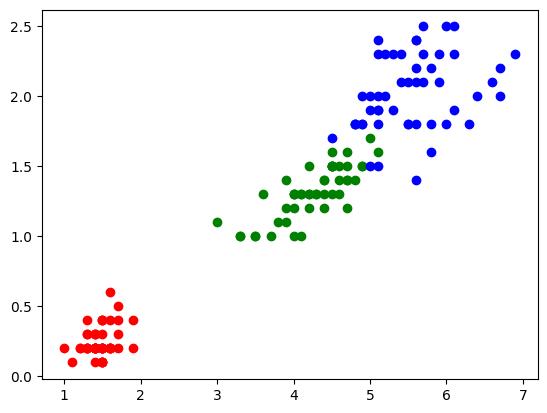

In [7]:
from matplotlib import pyplot as plt
for i in range(len(classes)):
  class_data = data[data[:,-1] == classes[i]]
  if len(class_data) > 0:
    if i == 0:
      plt.scatter(class_data[:,2], class_data[:,3], color='r')
    elif i == 1:
      plt.scatter(class_data[:,2], class_data[:,3], color='g')
    elif i == 2:
      plt.scatter(class_data[:,2], class_data[:,3], color='b')

plt.show()

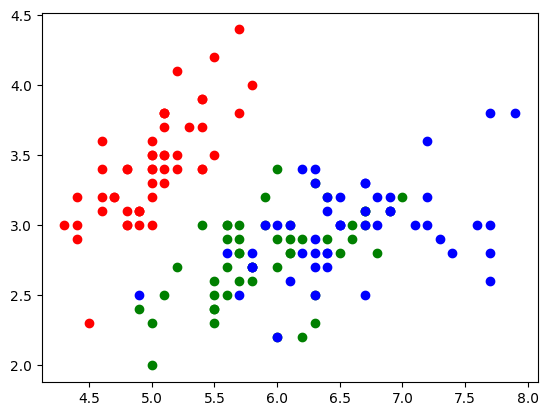

In [8]:
for i in range(len(classes)):
  class_data = data[data[:,-1] == classes[i]]
  if len(class_data) > 0:
    if i == 0:
      plt.scatter(class_data[:,0], class_data[:,1], color='r')
    elif i == 1:
      plt.scatter(class_data[:,0], class_data[:,1], color='g')
    elif i == 2:
      plt.scatter(class_data[:,0], class_data[:,1], color='b')

plt.show()